In [19]:
import pandas as pd

# Creating a sample dataset with an outlier
data = {
    'Country': ['USA', 'India', 'UK', 'Germany', 'Canada', 'Australia', 'Japan', 'Brazil', 'France', 'China'],
    'Users': [500, 5700, 450, 1480, 220, 2470, 190, 3510, 530, 10000]  # China has an outlier value
}

df = pd.DataFrame(data)
df.head()

,Country,Users
0,USA,500
1,India,5700
2,UK,450
3,Germany,1480
4,Canada,220


### Log in Data visualization

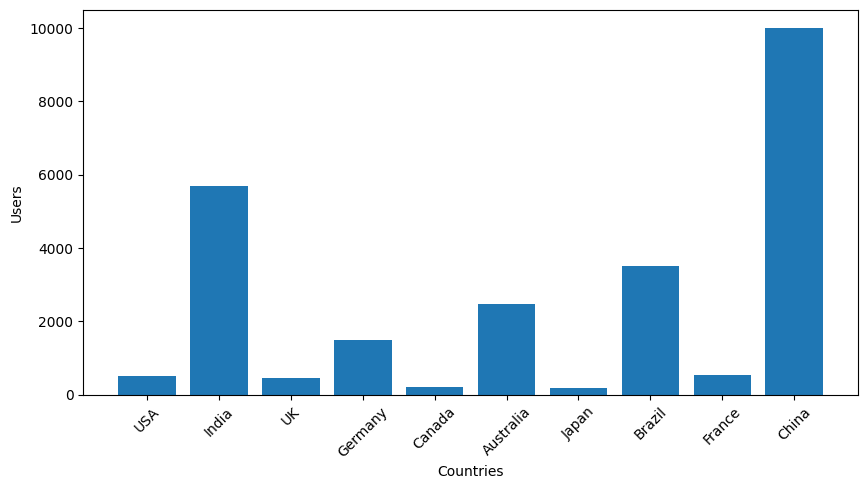

In [20]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.bar(df.Country, df.Users) 

# rotate x-labels 
plt.xticks(rotation=45)

plt.xlabel("Countries") 
plt.ylabel("Users")
plt.show()

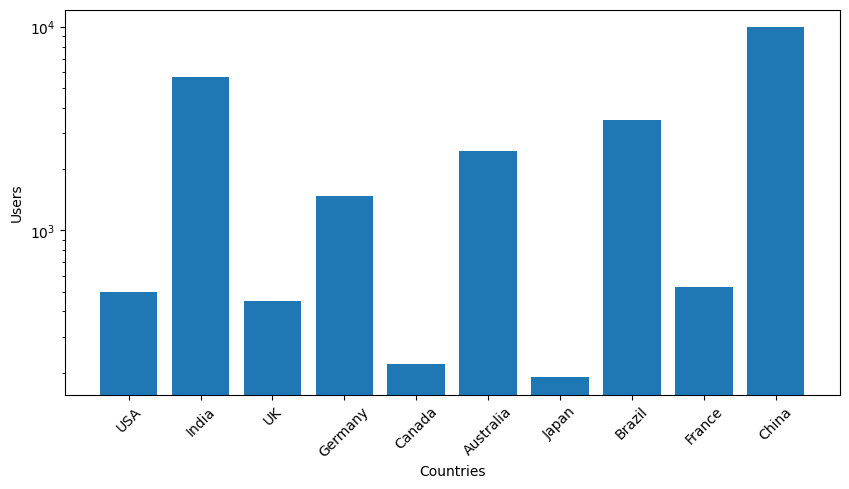

In [21]:
# Still some of are dominating by the larger data points like 10000 (China) 
plt.figure(figsize=(10, 5))
plt.bar(df.Country, df.Users) 

# rotate x-labels 
plt.xticks(rotation=45)

# apply log to take all vals into one scale 
plt.yscale("log")

plt.xlabel("Countries") 
plt.ylabel("Users")
plt.show()

Observation: More better, it simply applies exponent logic, to reshape the y-scale vals

### Log transform in ML

In [22]:
 # Creating a sample dataset
data = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Salary': [40000, 55000, 60000, 350000, 70000, 30000, 80000, 50000, 90000, 20000],  # Salaries in INR
}

# Adding Loan Eligibility (Eligible if Salary >= 50,000)
df = pd.DataFrame(data)
df['Loan_Eligible'] = df['Salary'].apply(lambda x: 'Yes' if x >= 50000 else 'No')

df.head()

,Employee_ID,Salary,Loan_Eligible
0,101,40000,No
1,102,55000,Yes
2,103,60000,Yes
3,104,350000,Yes
4,105,70000,Yes


1. If you observe the emp_id = 104 has more salary which can be treated as outlier, but the data-size is too low
2. In such cases, if we train a model, it becomes biased 
3. Log helps here to bring all vals into one scale

In [23]:
import numpy as np 

df["log_transformed"] = np.log10(df.Salary) 
df.head()

,Employee_ID,Salary,Loan_Eligible,log_transformed
0,101,40000,No,4.602060
1,102,55000,Yes,4.740363
2,103,60000,Yes,4.778151
3,104,350000,Yes,5.544068
4,105,70000,Yes,4.845098


Observation: Now, all the vals are in single scale and good to feed to the model

More over `log` used in loss-functions

### Log-normal Distribution

In [40]:
df = pd.read_csv("indian_brands_sales.csv") 
df.head(10)

,Brand,Sales
0,Tata,140903
1,Reliance,19182
2,Infosys,42095
3,Wipro,101015
4,HDFC,17428
5,Mahindra,17428
6,Maruti,106853
7,Asian Paints,47450
8,Bajaj,13773
9,Godrej,37894


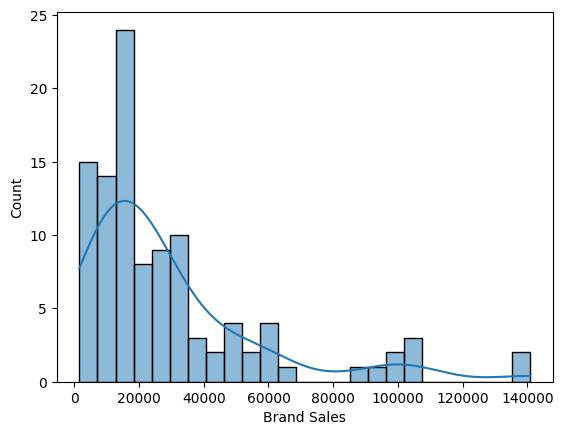

In [41]:
# histplot 
import seaborn as sns 

sns.histplot(df.Sales, bins=25, kde=True) 
plt.xlabel("Brand Sales") 
plt.ylabel("Count") 
plt.show()

##### Note: as you see, the data is right-skewed 
this can be solved by applying log for the x-axis, to make the it normal-distribution

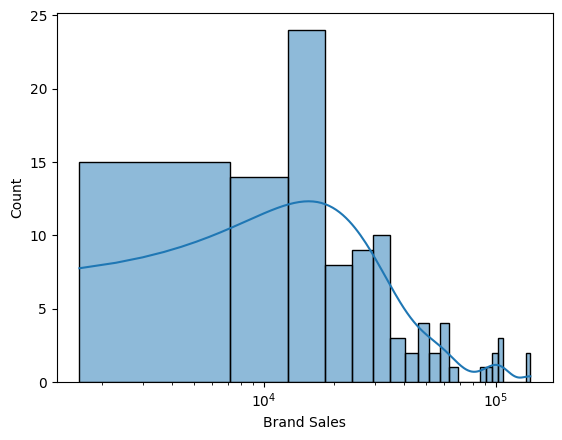

In [45]:
sns.histplot(df.Sales, bins=25, kde=True) 
plt.xscale("log")
plt.xlabel("Brand Sales") 
plt.ylabel("Count") 
plt.show()

##### Apply Log Transform for better visual in x-scale

In [46]:
df["log_transform"] = np.log10(df.Sales) 
df.head(10)

,Brand,Sales,log_transform
0,Tata,140903,5.148920
1,Reliance,19182,4.282894
2,Infosys,42095,4.624231
3,Wipro,101015,5.004386
4,HDFC,17428,4.241248
5,Mahindra,17428,4.241248
6,Maruti,106853,5.028787
7,Asian Paints,47450,4.676236
8,Bajaj,13773,4.139029
9,Godrej,37894,4.578570


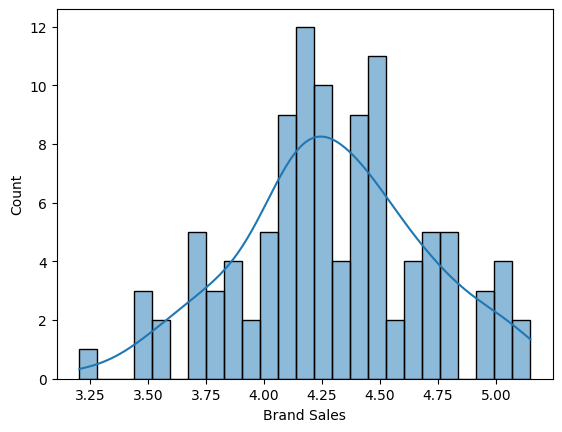

In [48]:
sns.histplot(df.log_transform, bins=25, kde=True) 
plt.xlabel("Brand Sales") 
plt.ylabel("Count") 
plt.show()

Observation: The bell curve formed like the data distribution is normal, this is the best use-case